# iBreakDown plots for classification models
*Author: Dariusz Komosiński*

In [2]:
library(devtools)
devtools::install_github("ModelOriented/DALEX2")
library(DALEX2)
library(iBreakDown)

Skipping install of 'DALEX2' from a github remote, the SHA1 (9b43c427) has not changed since last install.
  Use `force = TRUE` to force installation
Welcome to DALEX2 (version: 0.9).
Warning message:
“S3 methods ‘[.fun_list’, ‘[.grouped_df’, ‘all.equal.tbl_df’, ‘anti_join.data.frame’, ‘anti_join.tbl_df’, ‘arrange.data.frame’, ‘arrange.default’, ‘arrange.grouped_df’, ‘arrange.tbl_df’, ‘arrange_.data.frame’, ‘arrange_.tbl_df’, ‘as.data.frame.grouped_df’, ‘as.data.frame.rowwise_df’, ‘as.data.frame.tbl_cube’, ‘as.table.tbl_cube’, ‘as.tbl.data.frame’, ‘as.tbl.tbl’, ‘as.tbl_cube.array’, ‘as.tbl_cube.data.frame’, ‘as.tbl_cube.matrix’, ‘as.tbl_cube.table’, ‘as_tibble.grouped_df’, ‘as_tibble.tbl_cube’, ‘auto_copy.tbl_cube’, ‘auto_copy.tbl_df’, ‘cbind.grouped_df’, ‘collapse.data.frame’, ‘collect.data.frame’, ‘common_by.NULL’, ‘common_by.character’, ‘common_by.default’, ‘common_by.list’, ‘compute.data.frame’, ‘copy_to.DBIConnection’, ‘copy_to.src_local’, ‘default_missing.data.frame’, ‘default_mi

Here we will use the HR data to present the iBreakDown package for classification models.

In [3]:
head(HR)
new_observation <- HR_test[1,]
new_observation

gender,age,hours,evaluation,salary,status
male,32.58267,41.88626,3,1,fired
female,41.21104,36.34339,2,5,fired
male,37.70516,36.81718,3,0,fired
female,30.06051,38.96032,3,2,fired
male,21.10283,62.15464,5,3,promoted
male,40.11812,69.53973,2,0,fired


gender,age,hours,evaluation,salary,status
male,57.72683,42.31527,2,2,fired


## GLM

First, we fit a model.

In [4]:
library(nnet)
m_glm <- multinom(status ~ . , data = HR, probabilities = TRUE, model = TRUE)

# weights:  21 (12 variable)
initial  value 8620.810629 
iter  10 value 7002.127738
iter  20 value 6239.478146
iter  20 value 6239.478126
iter  20 value 6239.478124
final  value 6239.478124 
converged


To understand the factors that drive predictions for a single observation we use the `iBreakDown` package.

However sometimes we need to create our own predict function which returns probalilities.


In [5]:
p_fun <- function(object, newdata){predict(object, newdata=newdata, type="prob")}
# p_fun <- function(object, newdata){
#   if (nrow(newdata) == 1) {
#      as.data.frame(t(predict(object, newdata, type = "prob")))
#   } else {
#     as.data.frame(predict(object, newdata=newdata, type="prob"))
#   }
# }

Now we create an object of the `break_down` class. If we want to plot distributions of partial predictions, use argument `keep_distributions`. 

In [7]:
bd_glm <- local_attributions(m_glm,
                            data = HR_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE,
                            predict_function = p_fun)

We can simply print the result.

In [9]:
#bd_glm

Or plot the result which is more clear.

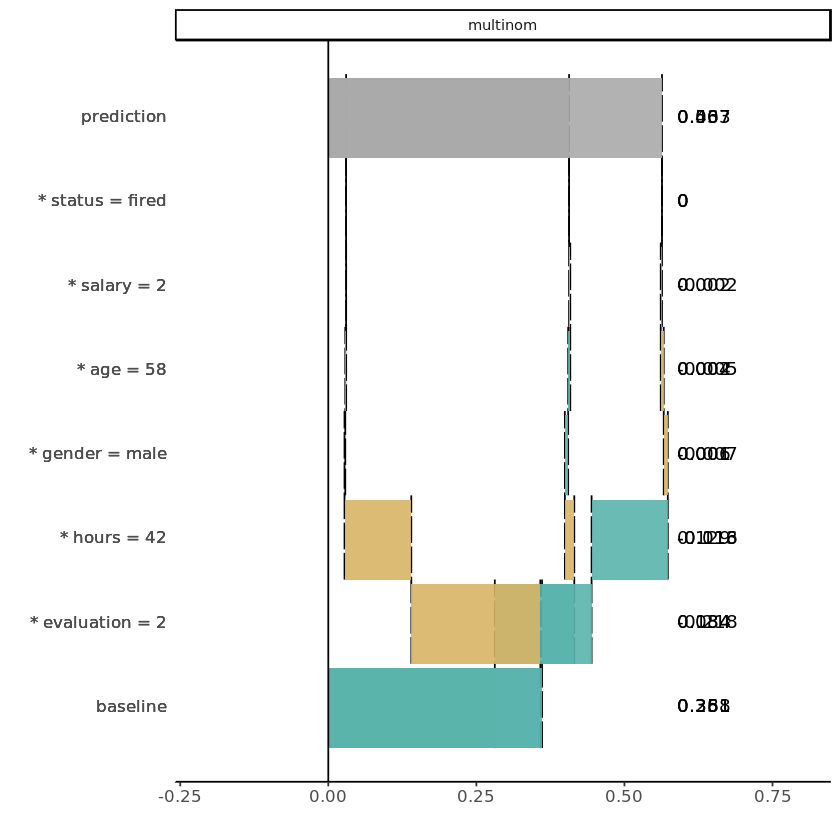

In [10]:
plot(bd_glm)

Use the `start_baseline` argument to set the origin of plots.

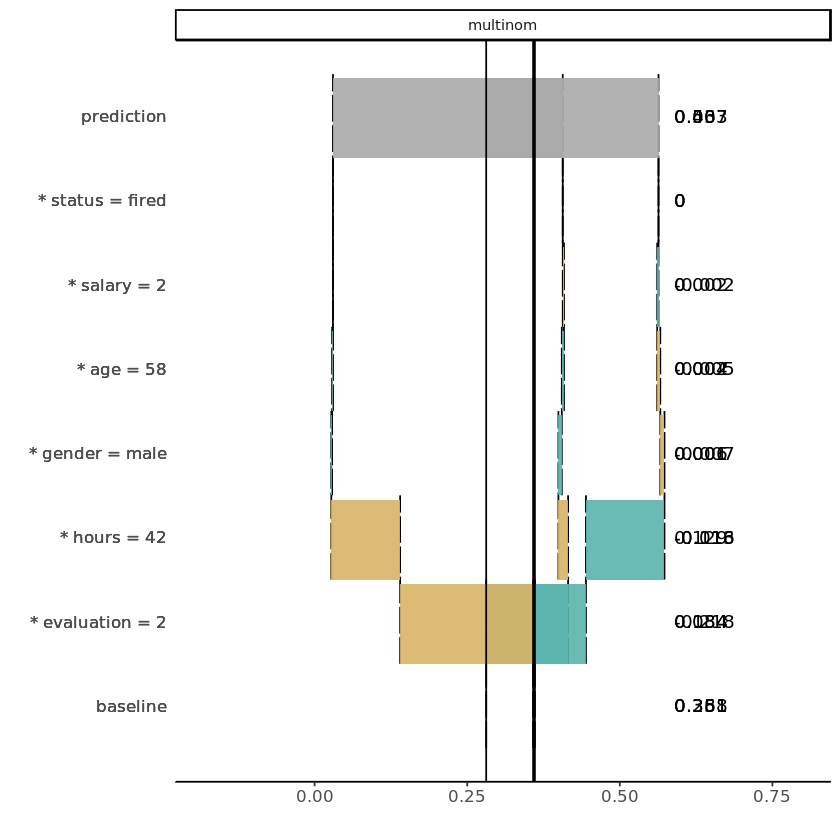

In [11]:
plot(bd_glm, start_baseline = TRUE)

Use the `plot_distributions` argument to see distributions of partial predictions.

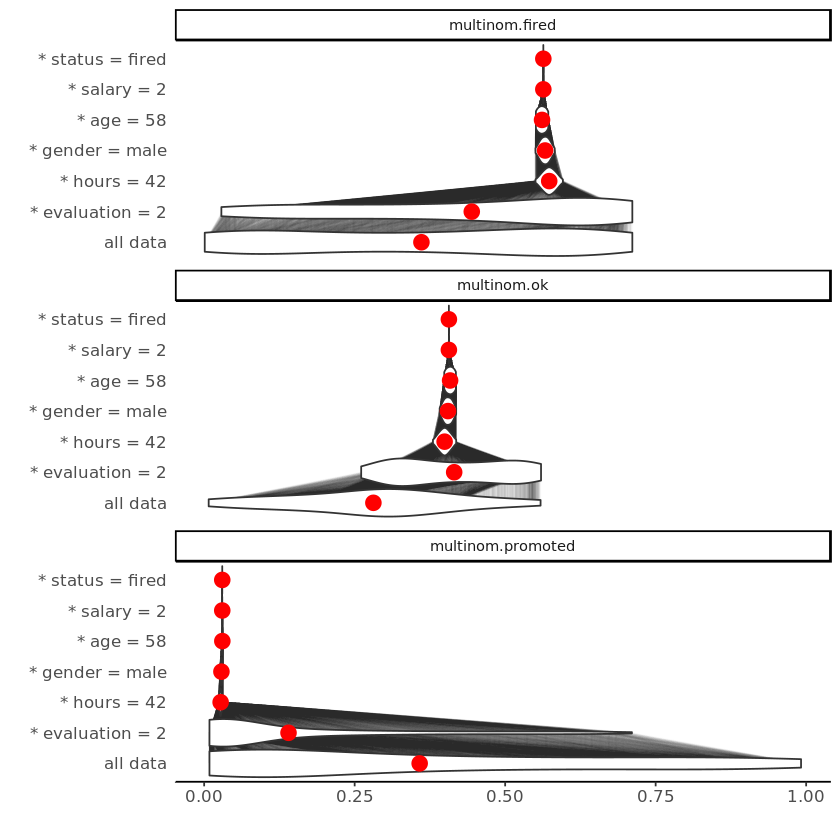

In [12]:
plot(bd_glm, plot_distributions = TRUE)

For another type of models we proceed analogously.

## randomForest

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


                                                contribution
randomForest.formula.fired: baseline                   0.377
randomForest.formula.fired: * hours = 42               0.234
randomForest.formula.fired: * evaluation = 2           0.064
randomForest.formula.fired: * salary = 2              -0.237
randomForest.formula.fired: * gender = male            0.032
randomForest.formula.fired: * age = 58                 0.332
randomForest.formula.fired: * status = fired           0.000
randomForest.formula.fired: prediction                 0.802
randomForest.formula.ok: baseline                      0.270
randomForest.formula.ok: * hours = 42                 -0.046
randomForest.formula.ok: * evaluation = 2              0.094
randomForest.formula.ok: * salary = 2                  0.235
randomForest.formula.ok: * gender = male              -0.034
randomForest.formula.ok: * age = 58                   -0.321
randomForest.formula.ok: * status = fired              0.000
randomForest.formula.ok:

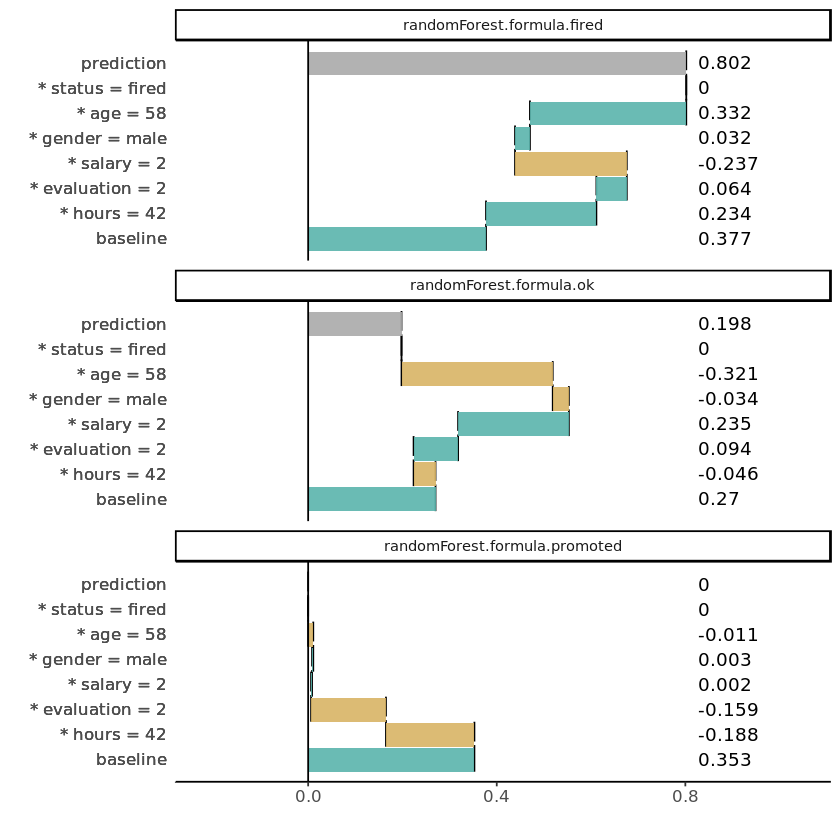

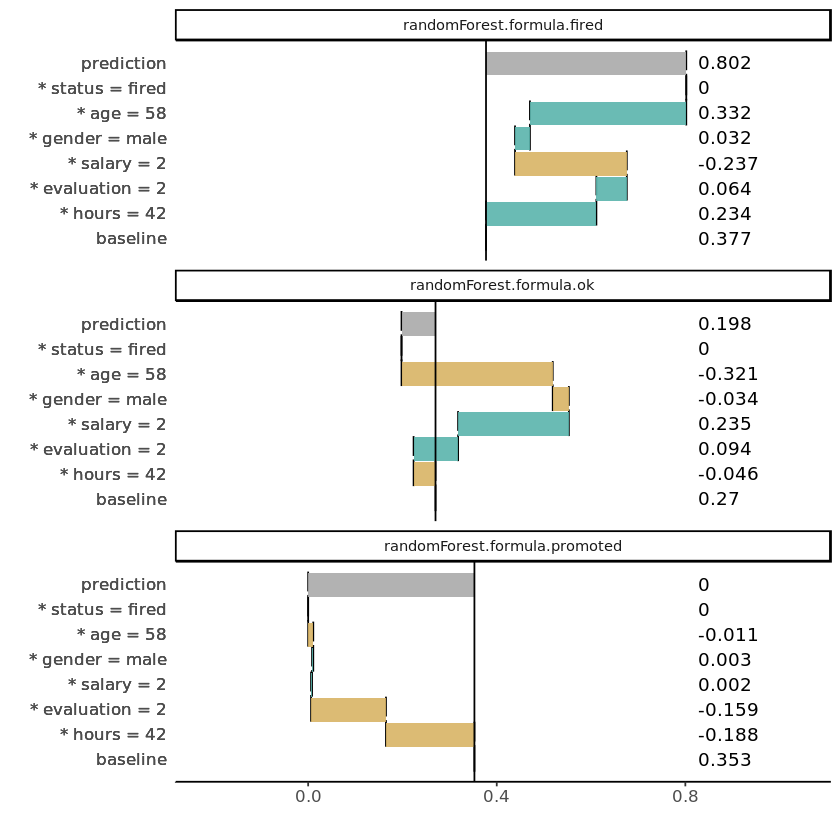

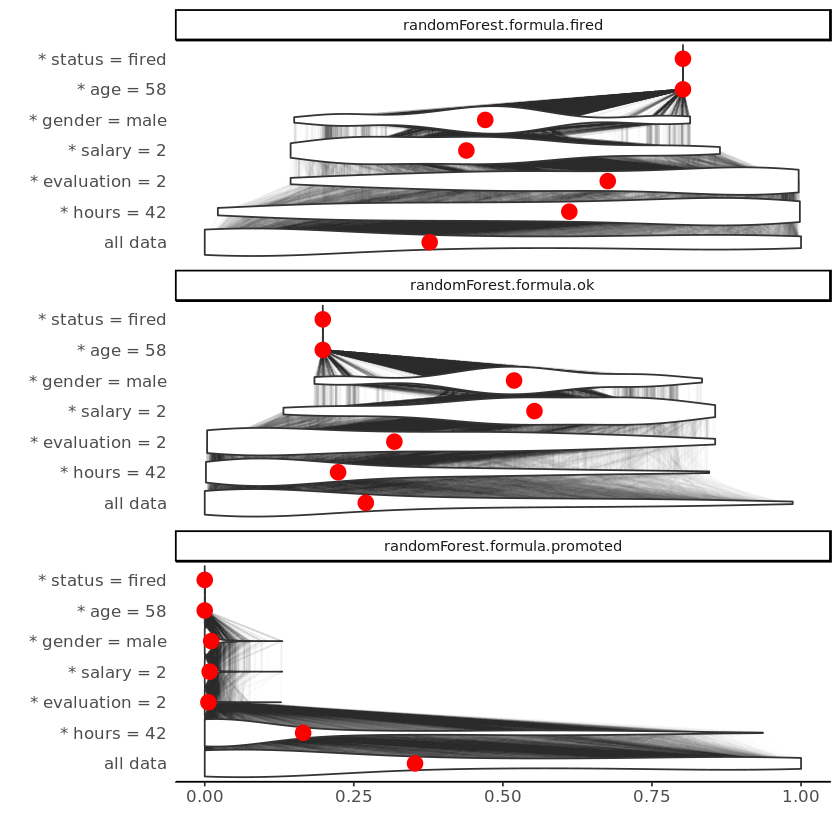

In [13]:
library(randomForest)
m_rf <- randomForest(status ~ . , data = HR)
p_fun <- function(object, newdata){predict(object, newdata=newdata, type="prob")}
bd_rf <- local_attributions(m_rf,
                            data = HR_test,
                            new_observation =  new_observation,
                            predict_function = p_fun,
                            keep_distributions = TRUE)
bd_rf
plot(bd_rf)
plot(bd_rf, start_baseline = TRUE)
plot(bd_rf, plot_distributions = TRUE)

## SVM

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


                                       contribution
svm.formula.fired: baseline                   0.366
svm.formula.fired: * evaluation = 2           0.047
svm.formula.fired: * salary = 2              -0.175
svm.formula.fired: * hours = 42               0.066
svm.formula.fired: * gender = male            0.001
svm.formula.fired: * age = 58                 0.292
svm.formula.fired: * status = fired           0.000
svm.formula.fired: prediction                 0.597
svm.formula.promoted: baseline                0.347
svm.formula.promoted: * evaluation = 2       -0.182
svm.formula.promoted: * salary = 2            0.028
svm.formula.promoted: * hours = 42           -0.140
svm.formula.promoted: * gender = male         0.009
svm.formula.promoted: * age = 58             -0.014
svm.formula.promoted: * status = fired        0.000
svm.formula.promoted: prediction              0.048
svm.formula.ok: baseline                      0.287
svm.formula.ok: * evaluation = 2              0.135
svm.formula.

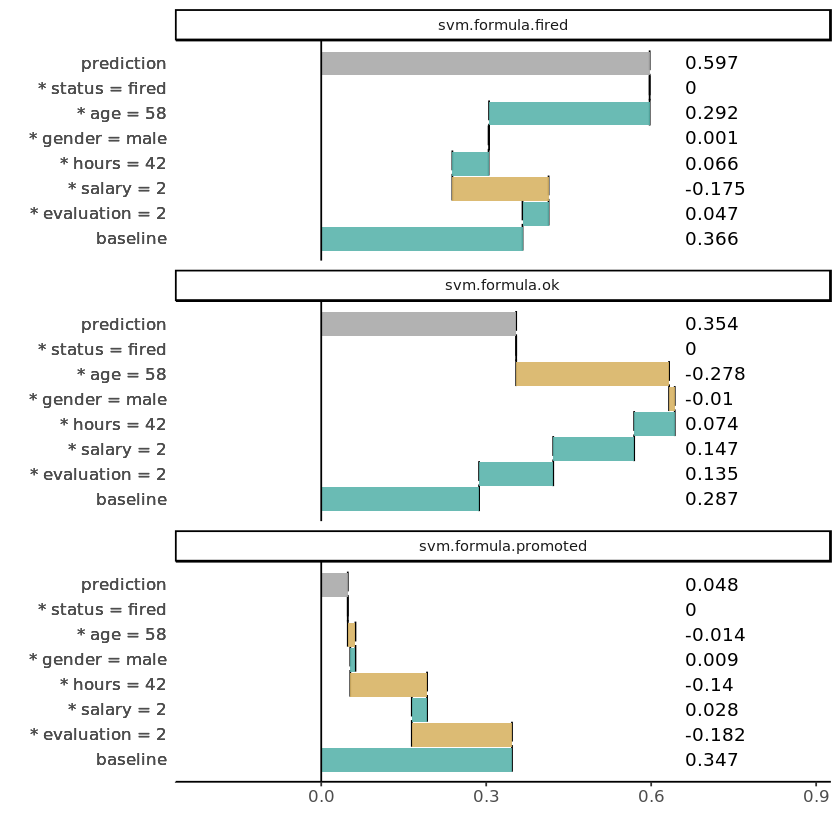

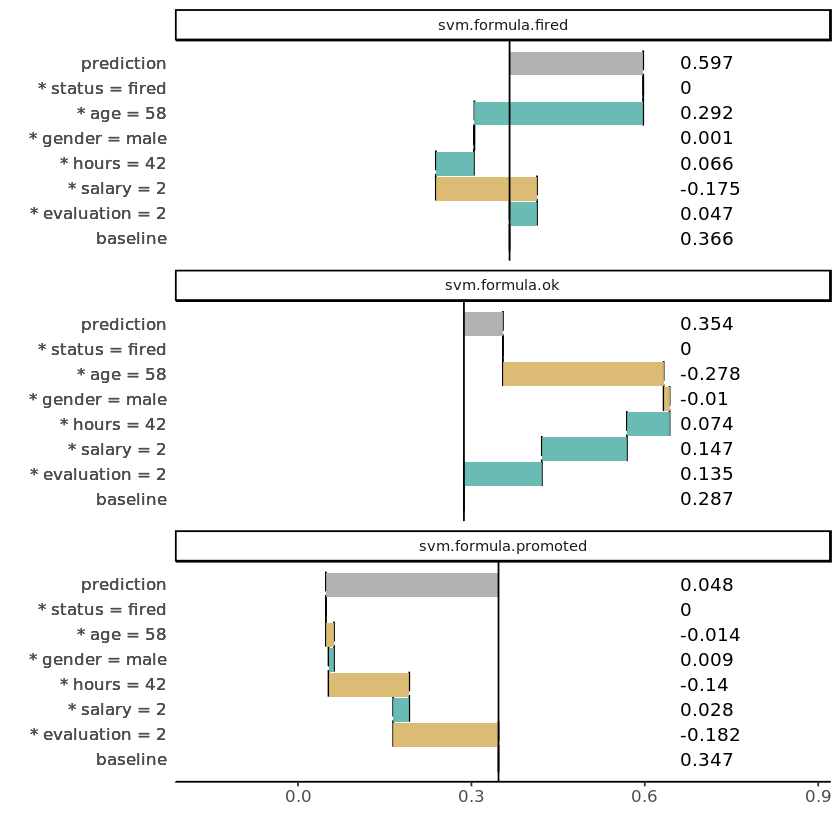

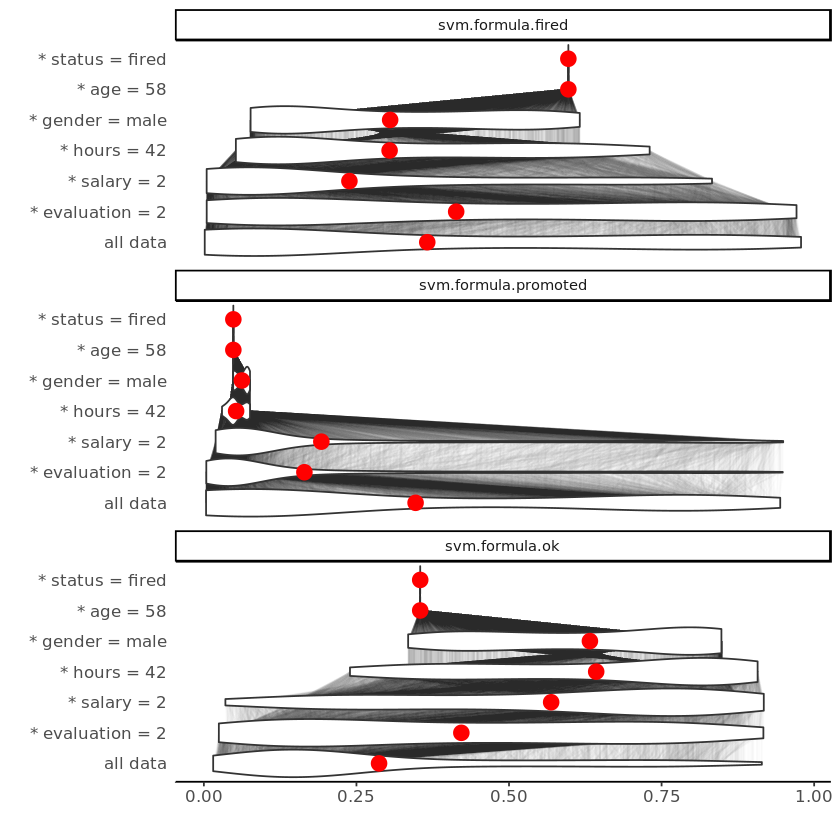

In [14]:
install.packages("e1071")
library(e1071)
m_svm <- svm(status ~ . , data = HR, type = "C-classification", probability = TRUE)
p_fun <- function(object, newdata){
  p <- predict(object, newdata = newdata, probability = TRUE)
  attr(p, "probabilities")
  }
bd_svm <- local_attributions(m_svm,
                            data = HR_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE,
                            predict_function = p_fun)
bd_svm
plot(bd_svm)
plot(bd_svm, start_baseline = TRUE)
plot(bd_svm, plot_distributions = TRUE)

## knn

In [15]:
#install.packages("caret")
library(caret)
m_knn <- knn3(status ~ . , data = HR, k = 5)
bd_knn <- local_attributions(m_knn,
                            data = HR_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE)
bd_knn
plot(bd_knn)
plot(bd_knn, start_baseline = TRUE)
plot(bd_knn, plot_distributions = TRUE)

ERROR: Error in library(caret): there is no package called ‘caret’


## nnet

# weights:  93
initial  value 12694.427939 
iter  10 value 8569.045339
iter  20 value 8315.909981
iter  30 value 8006.077223
iter  40 value 7107.439230
iter  50 value 6395.796264
iter  60 value 6315.457798
iter  70 value 6256.293509
iter  80 value 6180.384265
iter  90 value 6053.620439
iter 100 value 5818.050220
final  value 5818.050220 
stopped after 100 iterations


                                        contribution
nnet.formula.fired: baseline                   0.376
nnet.formula.fired: * evaluation = 2           0.085
nnet.formula.fired: * hours = 42               0.155
nnet.formula.fired: * age = 58                 0.043
nnet.formula.fired: * gender = male            0.063
nnet.formula.fired: * salary = 2               0.003
nnet.formula.fired: * status = fired           0.000
nnet.formula.fired: prediction                 0.726
nnet.formula.ok: baseline                      0.249
nnet.formula.ok: * evaluation = 2              0.122
nnet.formula.ok: * hours = 42                 -0.023
nnet.formula.ok: * age = 58                   -0.029
nnet.formula.ok: * gender = male              -0.054
nnet.formula.ok: * salary = 2                 -0.003
nnet.formula.ok: * status = fired              0.000
nnet.formula.ok: prediction                    0.262
nnet.formula.promoted: baseline                0.375
nnet.formula.promoted: * evaluation = 2       

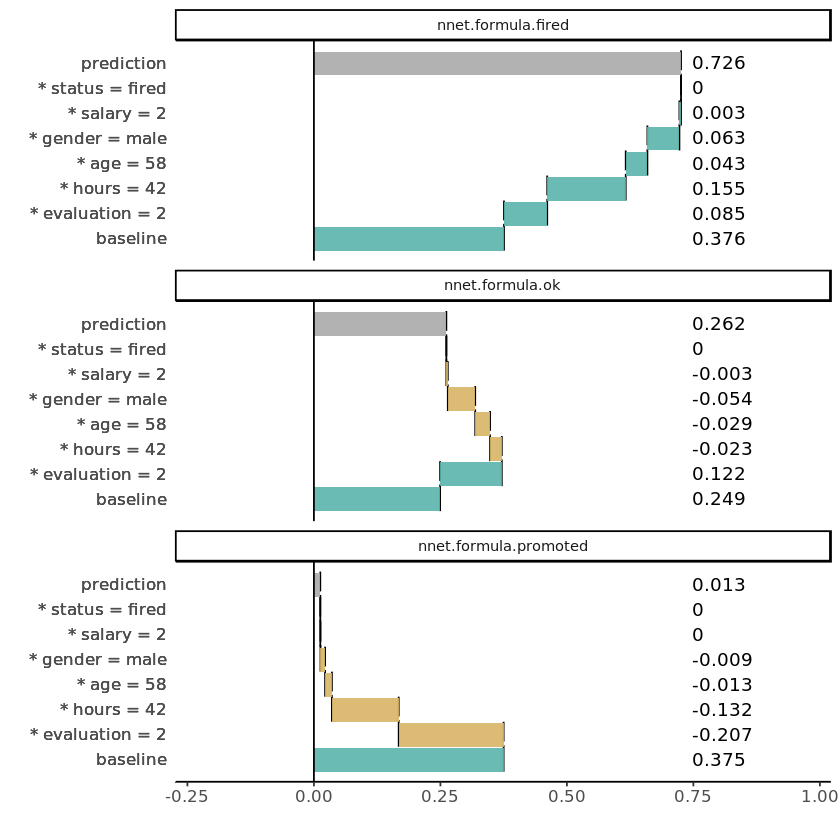

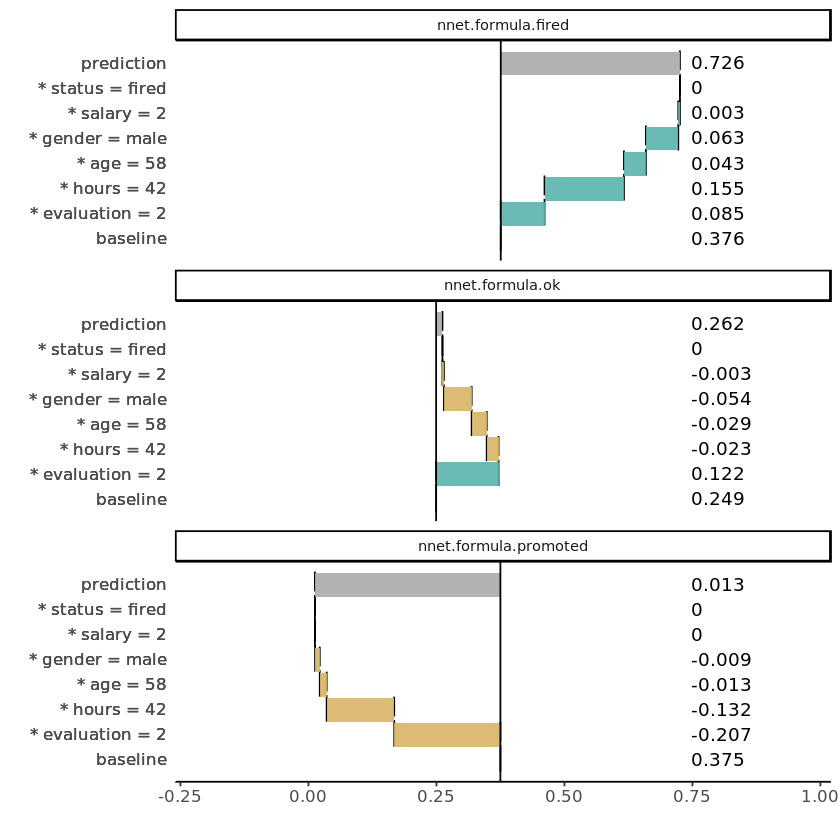

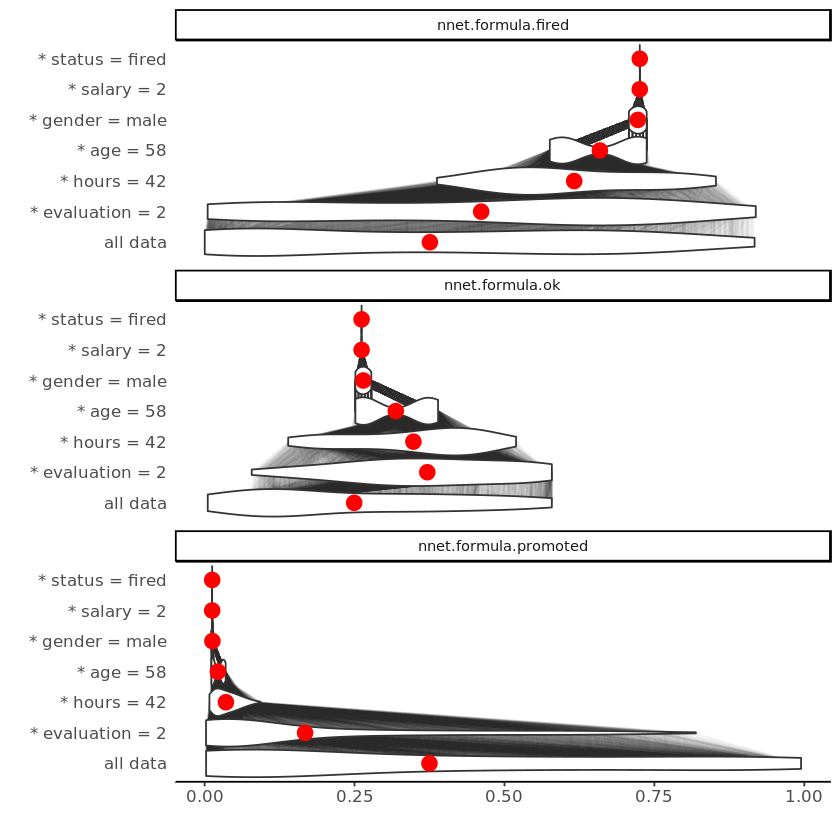

In [16]:
library(nnet)
m_nnet <- nnet(status ~ . , data = HR, size = 10)
bd_nnet <- local_attributions(m_nnet,
                            data = HR_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE)
bd_nnet
plot(bd_nnet)
plot(bd_nnet, start_baseline = TRUE)
plot(bd_nnet, plot_distributions = TRUE)